In [1]:
import pandas as pd
import numpy as  np
import pycaret
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [2]:
data = pd.read_csv('01_homely_resort_listing.csv')
data.head()

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,cancellation_policy,guests_included,...,number_of_reviews,property_type,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,Unnamed: 25,price
0,6,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",0,2.5,Real Bed,1.0,3.0,1,moderate,1,...,1,House,10.0,10.0,10.0,100.0,10.0,Private room,NaN,$300.00
1,2,"{""Air Conditioning"",Heating,""Family/Kid Friend...",29,0.0,Futon,1.0,1.0,1,moderate,1,...,0,Camper/RV,NaN,NaN,NaN,NaN,NaN,Private room,NaN,$99.00
2,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,1.5,Real Bed,1.0,1.0,2,flexible,1,...,0,House,NaN,NaN,NaN,NaN,NaN,Private room,NaN,$100.00
3,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,1.5,Real Bed,1.0,1.0,2,flexible,1,...,0,House,NaN,NaN,NaN,NaN,NaN,Private room,NaN,$100.00
4,6,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",27,2.0,Real Bed,3.0,3.0,2,strict,1,...,0,House,NaN,NaN,NaN,NaN,NaN,Entire home/apt,NaN,$599.00


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5834 entries, 0 to 5833
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   accommodates                    5834 non-null   int64  
 1   amenities                       5834 non-null   object 
 2   availability_30                 5834 non-null   int64  
 3   bathrooms                       5788 non-null   float64
 4   bed_type                        5834 non-null   object 
 5   bedrooms                        5828 non-null   float64
 6   beds                            5811 non-null   float64
 7   calculated_host_listings_count  5834 non-null   int64  
 8   cancellation_policy             5834 non-null   object 
 9   guests_included                 5834 non-null   int64  
 10  has_availability                5834 non-null   object 
 11  host_is_superhost               5819 non-null   object 
 12  host_listings_count             58

In [4]:
data.shape

(5834, 27)

In [5]:
data.isna().sum()

accommodates                         0
amenities                            0
availability_30                      0
bathrooms                           46
bed_type                             0
bedrooms                             6
beds                                23
calculated_host_listings_count       0
cancellation_policy                  0
guests_included                      0
has_availability                     0
host_is_superhost                   15
host_listings_count                 15
instant_bookable                     0
latitude(North)                      0
longitude(East)                      0
maximum_nights                       0
number_of_reviews                    0
property_type                        0
review_scores_checkin             2057
review_scores_communication       2057
review_scores_location            2056
review_scores_rating              2046
review_scores_value               2057
room_type                            0
Unnamed: 25              

Text(0.5, 1.0, 'Distribution of Room')

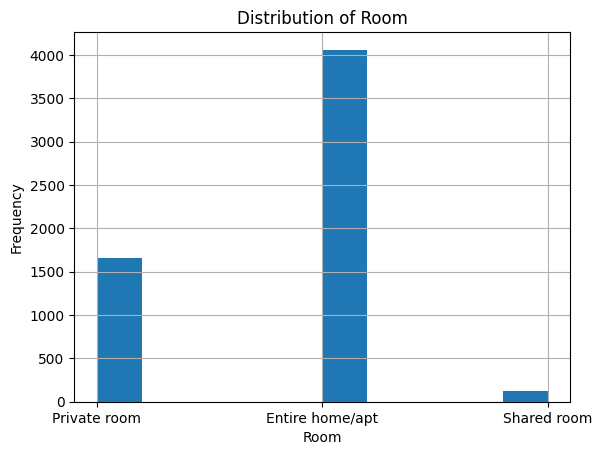

In [6]:
data['room_type'].hist()

# add labels and title
plt.xlabel('Room')
plt.ylabel('Frequency')
plt.title('Distribution of Room')

After looking at the csv file, it is shown that every column in "has_availability" has the same value of "t" hence the column will be removed.

I will also remove outliers in the "host_listing_count" as some values are way above the norm such as 301 and 339

in "host_is_superhost", "instant_bookable" column, since the values are 't' or 'f' the values will be replaced to 1 and 0

"maximum_nights" will be filtered down to have a maximum value of 365 as there are "interesting" values such as 9999 and 26000

next, columns such as "bed_type", "cancellation_policy", "property_type", "room_type" will be converted to categorical values

lastly the "amenities" column will be dropped for convenience sakes

if everything seems correct, the final dataframe will have 1424 rows

In [7]:
data.shape

(5834, 27)

In [8]:
# changing the format of the price from $300.00 to 300.00
data['price'] = data['price'].replace('[^\d.]','',regex=True)

#drop columns
data = data.drop(columns='Unnamed: 25')
data = data.dropna()
data = data.drop(columns=['has_availability','amenities'])

#filtering data
data = data[data['host_listings_count'] < 50]
data = data[data['maximum_nights'] <= 365]

#replacing string to binary
data['host_is_superhost'] = data['host_is_superhost'].replace({'t': 1, 'f': 0})
data['instant_bookable'] = data['instant_bookable'].replace({'t': 1, 'f': 0})

#replacing string with categorical values
data['bed_type'] = data['bed_type'].astype('object')
data['cancellation_policy'] = data['cancellation_policy'].astype('object')
data['property_type'] = data['property_type'].astype('object')
data['room_type'] = data['room_type'].astype('object')

data['price'] = data['price'].astype(float).astype(int)


In [9]:
data.shape
data = data.reset_index()

In [10]:
data.head()

,index,accommodates,availability_30,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,cancellation_policy,guests_included,...,maximum_nights,number_of_reviews,property_type,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,price
0,0,6,0,2.5,Real Bed,1.0,3.0,1,moderate,1,...,10,1,House,10.0,10.0,10.0,100.0,10.0,Private room,300
1,7,2,16,1.0,Real Bed,1.0,1.0,1,moderate,2,...,7,2,House,10.0,10.0,10.0,100.0,10.0,Private room,40
2,12,2,25,1.0,Real Bed,1.0,1.0,5,strict,1,...,14,4,House,10.0,10.0,10.0,100.0,10.0,Private room,49
3,23,6,19,1.0,Real Bed,1.0,2.0,1,moderate,4,...,30,76,House,10.0,10.0,9.0,94.0,10.0,Private room,50
4,26,2,19,1.5,Real Bed,1.0,2.0,2,strict,2,...,28,14,House,10.0,10.0,9.0,99.0,10.0,Private room,49


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424 entries, 0 to 1423
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           1424 non-null   int64  
 1   accommodates                    1424 non-null   int64  
 2   availability_30                 1424 non-null   int64  
 3   bathrooms                       1424 non-null   float64
 4   bed_type                        1424 non-null   object 
 5   bedrooms                        1424 non-null   float64
 6   beds                            1424 non-null   float64
 7   calculated_host_listings_count  1424 non-null   int64  
 8   cancellation_policy             1424 non-null   object 
 9   guests_included                 1424 non-null   int64  
 10  host_is_superhost               1424 non-null   int64  
 11  host_listings_count             1424 non-null   float64
 12  instant_bookable                14

In [12]:
from pycaret.regression import *
s = setup(data, target='price', session_id = 123)

,Description,Value
0,Session id,123
1,Target,price
2,Target type,Regression
3,Original data shape,"(1424, 25)"
4,Transformed data shape,"(1424, 47)"
5,Transformed train set shape,"(996, 47)"
6,Transformed test set shape,"(428, 47)"
7,Numeric features,20
8,Categorical features,4
9,Preprocess,True


In [13]:
best = compare_models(errors='raise')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:03:49
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Linear Regression


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,88.3495,28340.5304,164.0689,0.6347,0.4907,0.4765,2.9850
gbr,Gradient Boosting Regressor,93.1624,29956.4634,169.3880,0.6129,0.5263,0.5433,1.4720
lightgbm,Light Gradient Boosting Machine,97.4811,33310.4841,177.7582,0.5728,0.5473,0.5270,1.5660
rf,Random Forest Regressor,98.9192,32792.0701,177.7825,0.5708,0.5274,0.5856,2.2080
et,Extra Trees Regressor,99.3592,33791.7888,179.0068,0.5691,0.5204,0.5543,1.7200
xgboost,Extreme Gradient Boosting,101.0918,36238.4301,188.1097,0.5212,0.5422,0.5354,1.3620
lr,Linear Regression,115.1899,37327.0083,189.7857,0.5066,0.7757,0.7589,2.5610
ridge,Ridge Regression,114.4658,37380.9747,189.8611,0.5058,0.7700,0.7446,1.0110
br,Bayesian Ridge,113.9713,38376.1273,192.3175,0.4894,0.7488,0.7730,1.1030
lasso,Lasso Regression,113.8205,38289.0715,192.1205,0.4888,0.7380,0.7570,1.0050


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [16]:
best.get_params()

{'loss_function': 'RMSE',
 'border_count': 254,
 'verbose': False,
 'task_type': 'CPU',
 'random_state': 123}

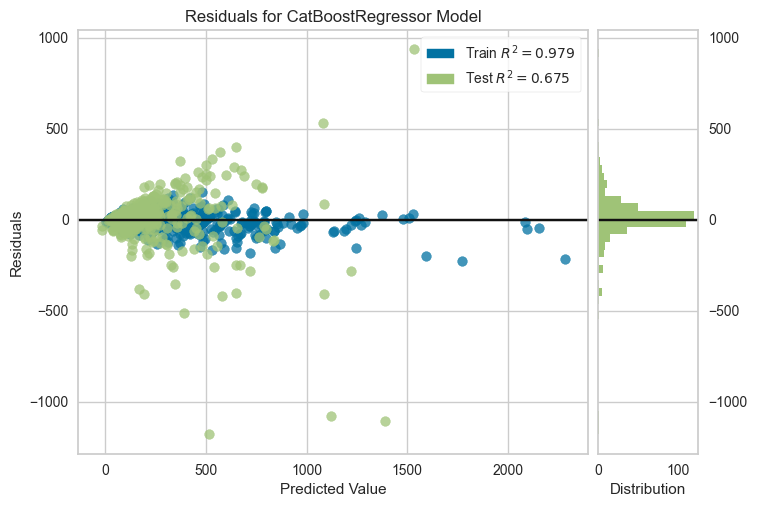

In [17]:
plot_model(best, plot='residuals')

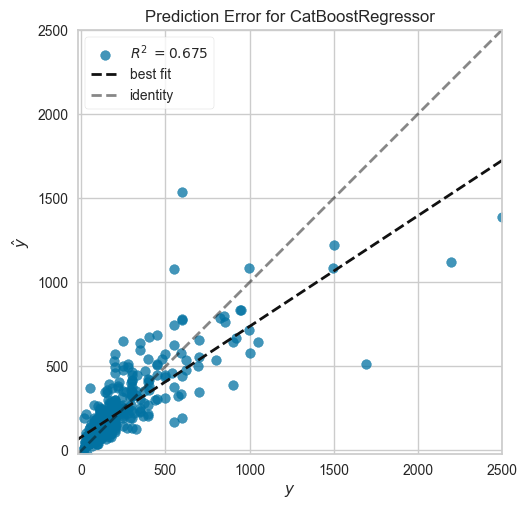

In [18]:
plot_model(best,plot='error')

In [19]:
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,78.8046,22869.6849,151.2273,0.6752,0.4682,0.4635


In [20]:
holdout_pred.head()

,index,accommodates,availability_30,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,cancellation_policy,guests_included,...,number_of_reviews,property_type,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,price,prediction_label
1184,4560,6,23,1.0,Real Bed,2.0,2.0,4,strict,7,...,49,House,10.0,10.0,10.0,95.0,9.0,Entire home/apt,165,271.906208
1422,5821,4,6,1.0,Real Bed,1.0,2.0,2,strict,2,...,195,Apartment,10.0,10.0,10.0,96.0,9.0,Entire home/apt,150,113.737634
980,3823,4,5,2.0,Real Bed,1.0,2.0,1,strict,2,...,2,Apartment,9.0,7.0,8.0,80.0,8.0,Private room,90,169.570875
969,3780,4,16,1.0,Real Bed,1.0,1.0,2,strict,2,...,37,House,10.0,10.0,10.0,97.0,9.0,Private room,129,98.623812
320,1428,3,7,1.0,Real Bed,1.0,1.0,1,moderate,2,...,15,Apartment,10.0,10.0,10.0,100.0,10.0,Entire home/apt,175,138.625578
